# Algoritmos de optimización - Reto 1

Nombre: Julio Emanuel Suriano Bryk

Github: [EmaSuriano](https://github.com/EmaSuriano/)

Link en Colab: https://colab.research.google.com/github/EmaSuriano/python-demos/blob/main/submits/Algoritmos_R1.ipynb

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit

# Avoid annoying warning for deprecations ... 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [6]:
def tower_of_hanoi(n_disc: int, from_pos: int, to_pos: int, aux_pos: int):
    if n_disc == 1:
        print("Move disk 1 from", from_pos, "to", to_pos)
        return

    tower_of_hanoi(n_disc - 1, from_pos=from_pos, to_pos=aux_pos, aux_pos=to_pos)
    print("Move disk", n_disc, "from", from_pos, "to", to_pos)
    tower_of_hanoi(n_disc - 1, from_pos=aux_pos, to_pos=to_pos, aux_pos=from_pos)


# Driver code
n_disc = 3
tower_of_hanoi(n_disc, from_pos=0, to_pos=2, aux_pos=1)

Move disk 1 from 0 to 2
Move disk 2 from 0 to 1
Move disk 1 from 2 to 1
Move disk 3 from 0 to 2
Move disk 1 from 1 to 0
Move disk 2 from 1 to 2
Move disk 1 from 0 to 2


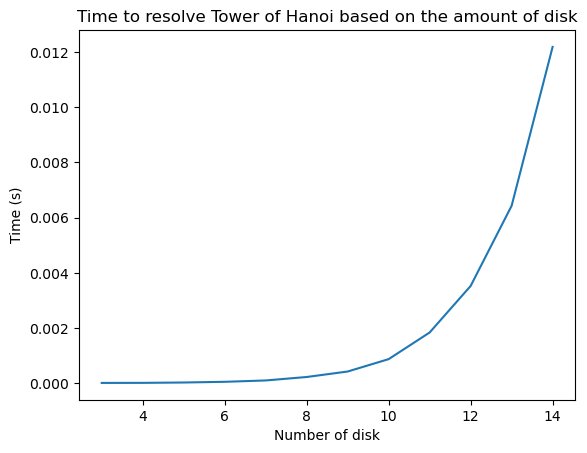

In [7]:
import sys
import os

class SuppressPrint:
    '''Class to suppress print and avoid terminal pollution when running many laps'''
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stdout = self._original_stdout

n_disc_lists = list(range(3, 15))

with SuppressPrint():
    execution_time = [
        timeit(lambda: tower_of_hanoi(n, 0, 1, 2), number=1) for n in n_disc_lists
    ]

sns.lineplot(x=n_disc_lists, y=execution_time)

plt.xlabel("Number of disk")
plt.ylabel("Time (s)")
plt.title("Time to resolve Tower of Hanoi based on the amount of disk")

plt.show()

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

In [8]:
expected = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 229]


def fibonacci_rec(n: int) -> int:
    if n == 0:
        return 0

    if n < 2:
        return 1

    return fibonacci_rec(n - 1) + fibonacci_rec(n - 2)


def fibonacci_lin(n: int) -> int:
    if n <= 0:
        return 0

    res = 1
    aux = 0

    for _ in range(1, n):
        aux, res = res, aux + res

    return res


print('Recursive:', fibonacci_rec(8))
print('Lineal:', fibonacci_lin(8))

Recursive: 21
Lineal: 21


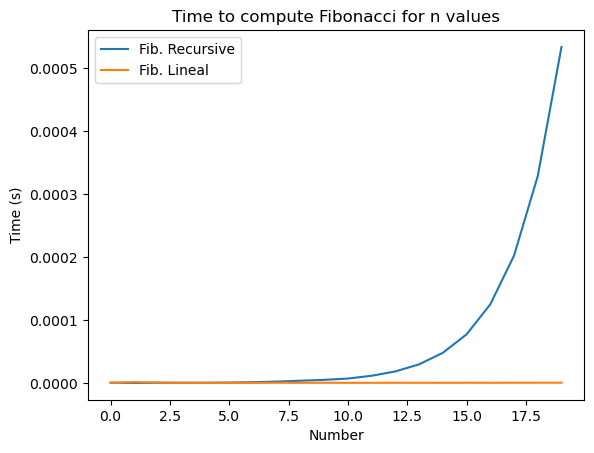

In [9]:
n_counts = list(range(20))

time_rec = [timeit(lambda: fibonacci_rec(n), number=1) for n in n_counts]
time_lin = [timeit(lambda: fibonacci_lin(n), number=1) for n in n_counts]

sns.lineplot(x=n_counts, y=time_rec, label="Fib. Recursive")
sns.lineplot(x=n_counts, y=time_lin, label="Fib. Lineal")

plt.xlabel("Number")
plt.ylabel("Time (s)")
plt.title("Time to compute Fibonacci for n values")

plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [10]:
def money_change_greedy(coins: list[int], total: int) -> list:
    """Given a list of coins and a total amount, the function returns a list of coins in order to reach the amount needed"""
    left = total
    res = []

    sorted_coins = sorted(coins)

    while left > 0:
        selected = sorted_coins[0]

        for coin in sorted_coins:
            if coin <= left and coin > selected:
                selected = coin

        res.append(selected)
        left -= selected

    return res


coins = [1, 6, 10]
total = 12 
res = money_change_greedy(coins, total)
print("Return change:", res)

Return change: [10, 1, 1]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [11]:
# Additional helpers


def are_queen_visible(pos1: tuple[int, int], pos2: tuple[int, int]) -> bool:
    """Given two positions, it returns if the queens are visible to each other"""
    x1, y1 = pos1
    x2, y2 = pos2

    return x1 == x2 or y1 == y2 or abs(x1 - x2) == abs(y1 - y2)


def is_safe_to_place(board: list[list], pos: tuple[int, int]) -> bool:
    """Given a board configuration and a position, it returns if the position will fit in the board"""
    for y, row in enumerate(board):
        try:
            queen_x = row.index(1)
            if are_queen_visible((queen_x, y), pos):
                return False

        except ValueError:
            # no queen in the current row, break the loop.
            break

    return True


def validate_result(queens: list):
    """Validate if a queens configuration is valid"""
    board = [[0 for _ in range(len(queens))] for _ in range(len(queens))]

    for y, x in enumerate(queens):
        if not is_safe_to_place(board, (x, y)):
            return False

        board[y][x] = 1

    return True


def draw_board(queens: list) -> str:
    """Print the chessboard in order to visualize the result visually

    Example: [0, 1, 2, 3] for queens located in (0,0), (1,1), (2,2), (3,3)
    """
    res = []
    board = []
    for queen_pos in queens:
        row = []
        for col in range(len(queens)):
            row.append("Q" if col == queen_pos else " ")
        board.append(row)

    for row in board:
        res.append("| " + " | ".join(row) + " | ")

    return "\n".join(res)


result = [1, 3, 0, 2]
print(draw_board(result))
print("Result is valid:", validate_result(result))

|   | Q |   |   | 
|   |   |   | Q | 
| Q |   |   |   | 
|   |   | Q |   | 
Result is valid: True


In [12]:
def n_queens(amount: int) -> list:
    """Given an amount of queens should return all the possible result for the configuration of queens

    Result is provided as list of the queens position: [1, 3, 0, 2]
    The index in array represents the row and the value is the column
    """
    # validation of entry params
    if amount < 1:
        raise Exception("amount should be bigger than 1")

    # generate nxn board based on given amount
    board = [[0 for _ in range(amount)] for _ in range(amount)]
    solutions = []

    def solve_queen(board: list[list], y: int) -> bool:
        # We reached the end of the board, therefore all the queens are placed
        if y >= len(board):
            solutions.append([row.index(1) for row in board])
            return True

        for x in range(len(board)):
            possible_queen = (x, y)
            if is_safe_to_place(board, possible_queen):
                # Place queen in board
                board[y][x] = 1

                # Move to the next row
                solve_queen(board, y + 1)

                # rollback last queen placed
                board[y][x] = 0

        # if no queen can be placed in the row we go back
        return False

    solve_queen(board, 0)
    # res = [row.index(1) for row in board]
    return solutions


result = n_queens(4)
print("Amount of solutions:", len(result))

for solution in result:
    print("Result is valid:", validate_result(solution))
    print(draw_board(solution))

Amount of solutions: 2
Result is valid: True
|   | Q |   |   | 
|   |   |   | Q | 
| Q |   |   |   | 
|   |   | Q |   | 
Result is valid: True
|   |   | Q |   | 
| Q |   |   |   | 
|   |   |   | Q | 
|   | Q |   |   | 


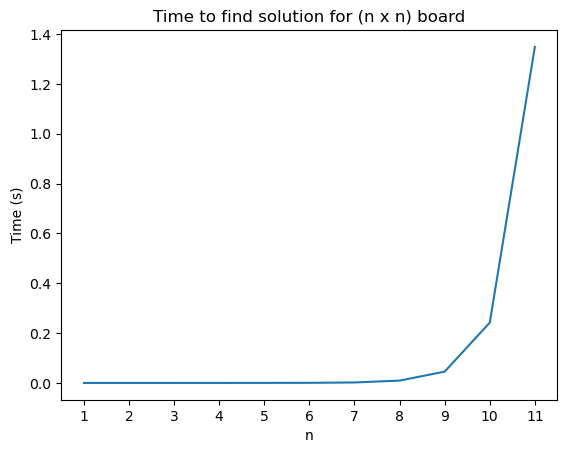

In [13]:
input_sizes = list(range(1, 12))
exec_time = [timeit(lambda: n_queens(n), number=1) for n in input_sizes]

sns.lineplot(x=input_sizes, y=exec_time)

plt.xticks(input_sizes)

plt.xlabel("n")
plt.ylabel("Time (s)")
plt.title("Time to find solution for (n x n) board")

plt.show()